### 학습목표
- 손글씨 데이터를 분류하는 딥러닝 모델 설계
- 다중분류 딥러닝 설계
    - 0~9까지 손글씨 데이터를 학습, 예측
    - 10개의 class를 가진다

In [56]:
# 기본라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
# 데이터 불러오기
# keras에서 제공해주는 손글씨 데이터 불러오기
from tensorflow.keras.datasets import mnist

In [58]:
# 훈련용, 테스트용 데이터로 이미 나누어져 들어가 있음
# 바로 변수에 대입
(X_train,y_train),(X_test, y_test) = mnist.load_data()

In [59]:
a,b,c,d = 1,2,3,4

In [60]:
a=b=c=4

In [61]:
# 데이터 크기확인
X_train.shape, y_train.shape
# 총 6만개의 학습데이터
# 28*28 픽셀을 가지는 데이터
# 픽셀 : 사진의 정보를 가지는 최소단위

((60000, 28, 28), (60000,))

In [62]:
# 테스트데이터 크기확인
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [63]:
# 정답데이터의 종류 확인
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

3


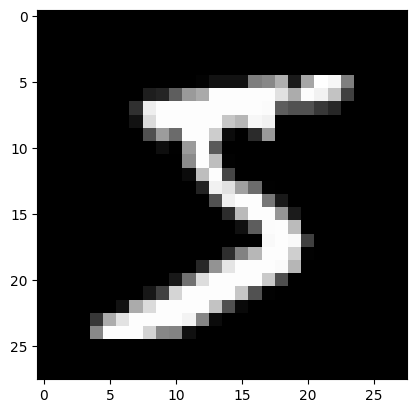

In [64]:
# 문제데이터 -> 손글씨데이터 확인
plt.imshow(X_train[0], cmap='gray')
# 흑백사진
# 얼마나 검정인가 흰색인가에 대한 정보를 가지는 데이터
# 0: 검은색, 255: 흰색
print(y_train[10000])

### MLP모델링
- 입력층의 구조, 출려긍의 구조 설계
- 학습능력을 위한 중간층의 깊이 고혀
- loss, optimizer 설정
- 학습결과 시각화

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Flatten
# Flatten : 2차원의 사진데이터를 선형모델이 처리할 수 있는 1차원 데이터 변경
# 현재 우리의 데이터 2차원(28*28) -> 1차원

In [66]:
# 신경망 모델 설계
# 뼈대 생성
model = Sequential()
# 입력층 설계
model.add(InputLayer(shape=(28,28))) # 28*28의 2차원 데이터
model.add(Flatten()) # 2차원 형태의 사진데이터를 1차원 변경(선형모델학습을 위함)
# 중간층(은닉층)
model.add(Dense(units=8, activation='sigmoid'))
model.add(Dense(units=16, activation='sigmoid'))
model.add(Dense(units=8, activation='sigmoid'))
# 출력층 -> 출력데이터의 형태 지정(다중분류)
model.add(Dense(units=10, activation="softmax"))
# 출력층에서의 활성화 함수의 역할 : 출력데이터의 형태 변경
# 분류: 확률값을 출력
# 다중분류 -> 클래스 개수만큼의 확률값이 출력
# softmax함수 : 클래스의 개수만큼의 결과 값이 출력 -> 총합 1인 확률로 변경

##### 정리(예측데이터에 따른 출력층 구성)
- 회귀 (1개의 연속값)
    - units = 1, activation = 'Linear'
- 이진분류 (1개의 확률값 -> 0~1)
    - units = 1, activation ='sigmoid'
- 다중분류 (클래스 개수의 확률값 -> 총합이 1)
    - units = 클래스 개수, activation ='softmax'

In [67]:
# 모델 학습방법 및 평가 방법 설정
model.compile(loss="categorical_crossentropy",
                optimizer='adam',
                metrics=['accuracy'])

##### 정리 (학습방법 및 평가방법 설정)
- loss : 학습과정 중 모델의 잘못된 정도를 측정하는 수치
    - 회귀 : mse
    - 이진분류 : binary_crossentropy
    - 다중분류 : categorical_crossentropy
- optimizer : 최적화 함수 -> w,b을 최적화해 나가는 알고리듬
    - 종류가 다양함
    - SGD, adam, momentum ...등
    - 각 함수들의 특징 수업 예정
- metrics : 평가지표
    - 분류 : 정확도(accuracy)
    - 회귀 : mse (평균제곱오차)

In [68]:
# 모델 학습
# model.fit(X_train, y_train,validation_split=0.2,epochs=20)
# 문제 발생!
# 오류를 확인해보니 -> 정답데이터의 shape 가 일치하지 않음!
# shape 가 다르면 학습이 불가
# y_train 데이터를 확인해보니 1개의 결과값(클래스중 1개를 출력)
# 모델링 출력결과 : 10개 클래스에 대한 확률값

In [69]:
y_train[0]

5

In [70]:
# 해결방법 2가지
# [방법 1 : 1개의 정답데이터의 형태를 10개의 확률값으로 변경]

In [71]:
# [방법 1 : 1개의 정답데이터의 형태를 10개의 확률값으로 변경]
from tensorflow.keras.utils import to_categorical
cate_y_train = to_categorical(y_train)
# 범주형 정답데이터를 확률값으로 변경해줌
cate_y_train.shape

(60000, 10)

In [72]:
cate_y_train[0:2]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [73]:
h = model.fit(X_train, cate_y_train, validation_split=0.2, epochs=20)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.1958 - loss: 2.1999 - val_accuracy: 0.3664 - val_loss: 1.6592
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3933 - loss: 1.5953 - val_accuracy: 0.5332 - val_loss: 1.4382
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1000us/step - accuracy: 0.5539 - loss: 1.3797 - val_accuracy: 0.6302 - val_loss: 1.1938
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 975us/step - accuracy: 0.6335 - loss: 1.1547 - val_accuracy: 0.6779 - val_loss: 1.0039
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6828 - loss: 0.9981 - val_accuracy: 0.7228 - val_loss: 0.8692
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7049 - loss: 0.8917 - val_accuracy: 0.6986 - val_loss: 0.9028
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 959us/step - accuracy: 0.7145 - loss: 0.8649 - val_accuracy: 0.7770 - val_loss: 0.7754
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 987us/step - accuracy: 0.7471 - loss: 

In [74]:
# [방법2 : complie 학습방법을 정의하는 부분에서 loss = 'sparse_categorical_crossentropy']
# sparse를 붙여서 사용 / 더 선호함
# 알아서 들어오는 데이터를 확률값으로 변경하여 비교
model.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

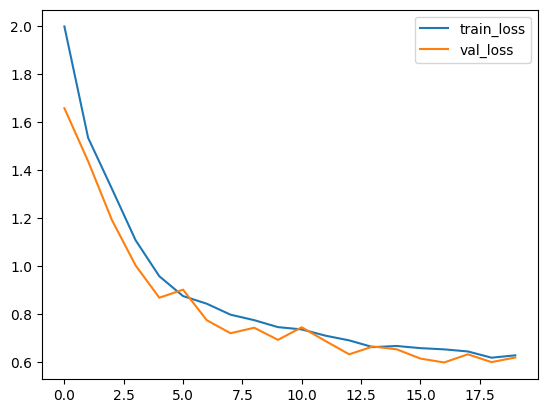

In [75]:
# 학습결과 시각화
plt.plot(h.history['loss'], label = "train_loss")
plt.plot(h.history['val_loss'], label = "val_loss")
plt.legend()
plt.show() 

In [76]:
# 모델 평가
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - accuracy: 0.7940 - loss: 0.6807


[0.6269389390945435, 0.8176000118255615]

In [ ]:
# 모델에 대한 전체적인 내부구조 확인
modeel.ser